In [2]:
#King County Home Price Prediction

In [605]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import datetime
pd.set_option("display.max_columns",55)
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [203]:
df=pd.read_csv("kc_house_data.csv")

In [279]:
df.head(16)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,23
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,29
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,61
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,64
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,21


In [10]:
#EDA

In [14]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20640,7203180070,20140919T000000,795000.0,4,3.25,3520,5250,2.0,0,0,...,9,3520,0,2012,0,98053,47.6869,-122.019,3220,5781


In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [195]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
id,1.000000,-0.016680,0.002707,0.005382,-0.012150,-0.132132,0.018403,-0.002727,0.011743,-0.023849,0.008207,-0.010818,-0.004971,0.021499,-0.016743,-0.001900,0.020818,-0.002887,-0.138823,-0.021499
price,-0.016680,1.000000,0.316409,0.525092,0.702047,0.089683,0.256894,0.266398,0.397209,0.036361,0.667455,0.605595,0.323642,0.053973,0.126205,0.306997,0.021590,0.585388,0.082469,-0.053973
bedrooms,0.002707,0.316409,1.000000,0.530069,0.592618,0.033233,0.181382,-0.006524,0.081925,0.025459,0.368703,0.492167,0.308821,0.161156,0.017788,-0.010929,0.134942,0.404825,0.030830,-0.161156
bathrooms,0.005382,0.525092,0.530069,1.000000,0.754604,0.087821,0.500988,0.063796,0.187436,-0.124899,0.665150,0.685504,0.283159,0.506303,0.050101,0.024532,0.223103,0.568761,0.087258,-0.506303
sqft_living,-0.012150,0.702047,0.592618,0.754604,1.000000,0.172912,0.354025,0.103871,0.284482,-0.058724,0.762903,0.876652,0.434719,0.318234,0.054965,0.052508,0.240258,0.756570,0.183373,-0.318234
sqft_lot,-0.132132,0.089683,0.033233,0.087821,0.172912,1.000000,-0.005189,0.021600,0.074720,-0.008930,0.113613,0.183541,0.015352,0.053043,0.007797,-0.085666,0.229512,0.144601,0.718554,-0.053043
floors,0.018403,0.256894,0.181382,0.500988,0.354025,-0.005189,1.000000,0.023705,0.029575,-0.263820,0.458353,0.523887,-0.245784,0.489679,0.006058,0.049633,0.125502,0.279981,-0.011259,-0.489679
waterfront,-0.002727,0.266398,-0.006524,0.063796,0.103871,0.021600,0.023705,1.000000,0.401915,0.016669,0.082775,0.072091,0.080659,-0.026182,0.093359,-0.014267,-0.041920,0.086465,0.030699,0.026182
view,0.011743,0.397209,0.081925,0.187436,0.284482,0.074720,0.029575,0.401915,1.000000,0.046123,0.251215,0.167616,0.276737,-0.053664,0.104211,0.006162,-0.078525,0.280351,0.072580,0.053664
condition,-0.023849,0.036361,0.025459,-0.124899,-0.058724,-0.008930,-0.263820,0.016669,0.046123,1.000000,-0.144583,-0.158177,0.174186,-0.361389,-0.060009,-0.015079,-0.106424,-0.092725,-0.003368,0.361389


In [197]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
age              0
dtype: int64

In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [199]:
abs(df.corr(numeric_only=True)["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702047
grade            0.667455
sqft_above       0.605595
sqft_living15    0.585388
bathrooms        0.525092
view             0.397209
sqft_basement    0.323642
bedrooms         0.316409
lat              0.306997
waterfront       0.266398
floors           0.256894
yr_renovated     0.126205
sqft_lot         0.089683
sqft_lot15       0.082469
yr_built         0.053973
condition        0.036361
long             0.021590
id               0.016680
age              0.053973
Name: price, dtype: float64

In [615]:
current_time = datetime.datetime.now()

In [617]:
df["age"]=current_time.year-df["yr_built"]

In [619]:
df["zipcode"]=df["zipcode"].astype("category")

In [621]:
x=df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","lat","waterfront","floors","age","zipcode","yr_renovated","condition"]]

In [623]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [625]:
df=df[df["bedrooms"]<10]
df=df[df["sqft_living"]<8000]
df=df[df["floors"]<3.5]

In [627]:
x=pd.get_dummies(x,drop_first=True)

In [629]:
y=df[["price"]]

In [631]:
lr=LinearRegression()

In [633]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [635]:
model=lr.fit(x_train,y_train)# Machine Learning

In [637]:
pred=lr.predict(x_test)

In [639]:
mean_squared_error(y_test, pred)**0.5

163706.36396555547

In [641]:
r2_score(y_test, pred)

0.7942258839701056

In [134]:
#target r2_score>0.80
# RMSE< 100$K


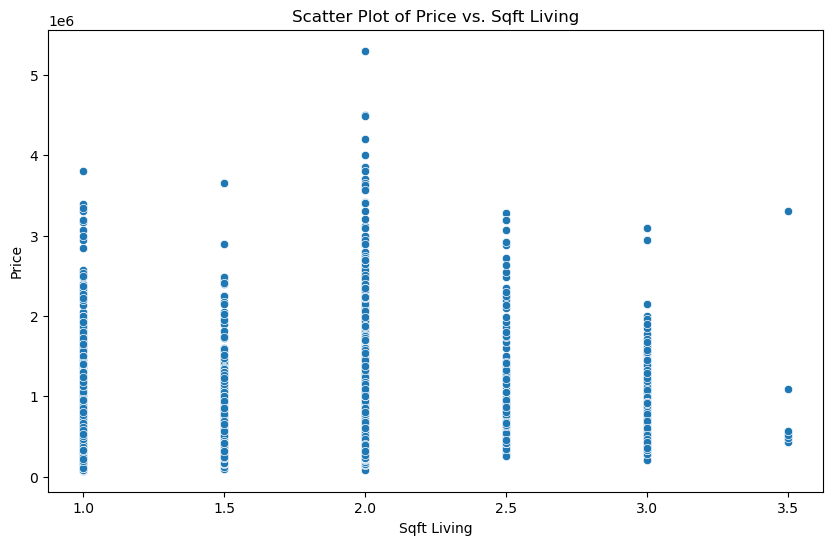

In [281]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floors', y='price', data=df)
plt.title('Scatter Plot of Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='floors', ylabel='Density'>

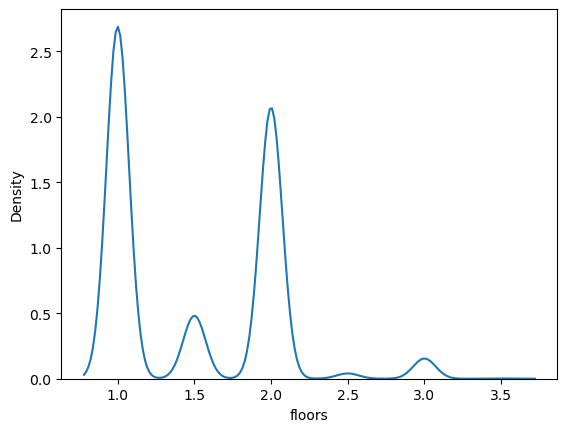

In [333]:
sns.kdeplot(x=df["floors"])

<Axes: xlabel='floors', ylabel='Density'>

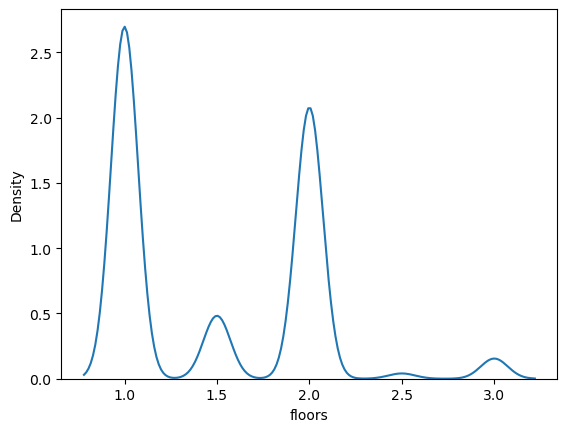

In [435]:
sns.kdeplot(x=df["floors"])

In [167]:
mean_squared_error(y_test, pred)**0.5

220235.80700644304

In [193]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


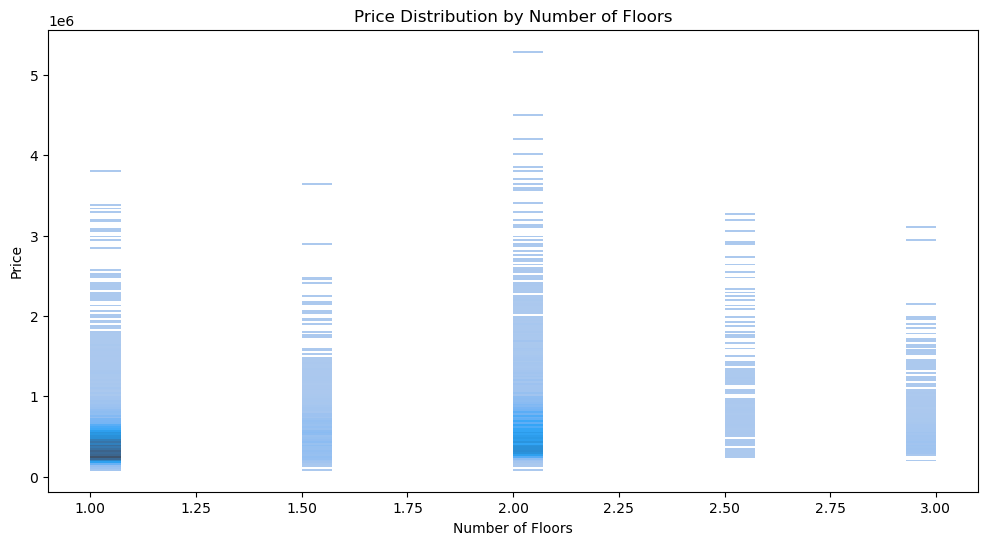

In [439]:
plt.figure(figsize=(12, 6))
sns.histplot(x='floors', y='price', data=df)
plt.title('Price Distribution by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()


In [289]:
count_3_floors = df[df['floors'] == 3.5].shape[0]
count_3_floors


8

In [359]:
x.head()

,floor_1.0,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5
0,True,False,False,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False


In [441]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [643]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [645]:
Rmodel=R.fit(x_train,y_train)
pred2=Rmodel.predict(x_test)
mean_squared_error(y_test, pred2)**0.5
r2_score(y_test, pred2)

0.7941601015047858

In [647]:
Lmodel=L.fit(x_train,y_train)
pred3=Lmodel.predict(x_test)
mean_squared_error(y_test, pred3)**0.5
r2_score(y_test, pred3)

0.7942141180609703

In [649]:
Emodel=E.fit(x_train,y_train)
pred4=Emodel.predict(x_test)
mean_squared_error(y_test, pred4)**0.5
r2_score(y_test, pred4)

0.5982135408255869

In [651]:
et=ExtraTreesRegressor()
etmodel=et.fit(x_train,y_train)
pred6=et.predict(x_test)


C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [653]:
mean_squared_error(y_test,pred6)**0.5

132267.58659437572

In [655]:
r2_score(y_test, pred6)

0.8656720218135326